# Oil Futures

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [2]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


<AxesSubplot:xlabel='Date'>

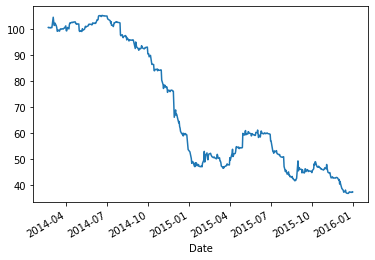

In [3]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

<AxesSubplot:xlabel='Date'>

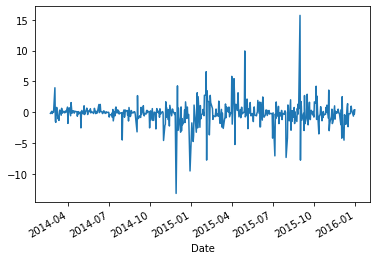

In [4]:
# Create a column of the settle price returns
df['Settle_returns'] = df['Settle'].pct_change()*100
df['Settle_returns'].plot()
 

In [13]:
# Add columns of returns and lagged returns to the data frame
df['lag_returns']= df['Settle_returns'].shift()
# The lagged returns are created to associate a date with its returns
df=df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Settle_returns,lag_returns
Date,,,,,,,,,,,
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320,-0.198472
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863,0.119320
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933,-0.019863
2014-03-03,104.69,104.69,104.69,104.69,2.33,104.69,760.0,11171.0,0.009933,3.982916,0.009933


# Prepapre the Features (X) and the Target (y)

In [24]:
# Set the Dependent variable y to the `Return`
y=df['Settle_returns']
y.shape
 

(460,)

In [14]:
# Select the `Lagged_Return` and assign the DataFrame to X
X=df['Lagged_Return'].to_frame()
X.head()
 

,Lagged_Return
Date,
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863
2014-03-03,0.009933


In [15]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year'] = X.index.weekofyear
X.head()
 

,Lagged_Return,Week_of_year
Date,,
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9
2014-03-03,0.009933,10


### Get dummy variables for week and year

In [17]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded .head()

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0.119320,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,-0.019863,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-03-03,0.009933,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_binary_encoded.shape

(460, 54)

### Linear Regresion model

In [25]:
# Create a Linear Regression model and fit it to the data
model= LinearRegression()
model.fit(X_binary_encoded, y, sample_weight=None)

 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Create predictions using the trained model and the `X_binary_encoded` data
predictions = model.predict(X_binary_encoded)



array([-0.22119141, -0.1138916 , -0.20922852, -0.16748047,  0.22949219,
       -0.96276855,  0.66235352,  0.72094727,  0.19995117, -1.31213379])

In [37]:
# List the first 10 predictions
predictions[:9]

array([-1.31213379, -0.96276855, -0.22119141, -0.20922852, -0.16748047,
       -0.1138916 ,  0.19995117,  0.22949219,  0.66235352])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)
print("r2:" f'{r2}')

r2:0.1954566468582717


In [41]:
# Calculate mean squared error 
mse=mean_squared_error(y, predictions)
mse
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
 

3.0109759390237354

In [42]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)
rmse

1.7352163954457482

In [43]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 0.1954566468582717
Mean Squared Error (MSE): 3.0109759390237354
Root Mean Squared Error (RMSE): 1.7352163954457482
Standard Deviation of Futures Return: 1.9345453585810768
